# GOOGLE OCR

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import keras_ocr

In [2]:
file_dir = os.getenv('HOME') + '/aiffel/ocr_python/file'
images = glob.glob(file_dir + '/*.jpeg')

In [3]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    
    file = plt.imread(path)
    plt.figure()
    plt.imshow(file)
    
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))
    
    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [4]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

# 입력 이미지 경로를 지정해 주세요.
path = '/home/aiffel0042/aiffel/ocr_python/test_image.png'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.


-rw-r--r-- 1 aiffel0042 aiffel0042 2344 10월  8 13:23 /home/aiffel0042/aiffel/ocr_python/my_google_api_key.json


In [5]:
def google():
    for img in images:
        detect_text(img)

Texts:

"Jazz
와인에 빠지다.
포스터 디자인 공모
선작 100원/
부산의 대표적인 제즈 상성 콘서트자즈 와인에 바지다"의
2020년 포스터디자엔 공모합니다.
공모기간 : 2020.2,5~2.28
www.de
u Ja. 에지다 모스터디자인 보
"

"Jazz"

"와인"

"에"

"빠지다"

"."

"포스터"

"디자인"

"공모"

"선작"

"100"

"원"

"/"

"부산"

"의"

"대표적인"

"제즈"

"상성"

"콘서트"

"자즈"

"와인"

"에"

"바지"

"다"

"""

"의"

"2020"

"년"

"포스터"

"디자"

"엔"

"공모"

"합니다"

"."

"공모"

"기간"

":"

"2020.2,5"

"~"

"2.28"

"www.de"

"u"

"Ja"

"."

"에지"

"다"

"모"

"스터"

"디자인"

"보"
bounds: (150,206),(159,206),(159,210),(150,210)
Texts:

"en 부 분의 연 인들의 헤어짐의 이유는 어떤 커다란
문제에 부딪쳐서 라기보다는 아주 작고 사소한 감정 문제일
때가 많다. 조그만 일로 한번 어긋나기 시작하면 사람들은 대
부분 자신의 편의에 맞는 방향으로 생각하게 되어 있다.
그래서 별것 아닌 문제를 확대경으로 들여다보며 그것을
크게 부풀리곤 한다. 그런 감정이 쌓이고 쌓여서 결국에는 이
별이라는 극단적인 상황을 맞게 되는 것이다. 하지만 훗날 평
상심으로 되돌아와 생각해 보면 이별의 이유는 아주 사소한
일이기 일쑤이다.
얼마나 안타까운 일인가. 너무도 사소한 일로 인해 그토록
자신을 불태웠던 사랑을 잃어버린다는 사실은
"

"en"

"부"

"분"

"의"

"연"

"인"

"들의"

"헤어짐"

"의"

"이유"

"는"

"어떤"

"커다란"

"문제"

"에"

"부딪쳐서"

"라기"

"보다는"

"아주"

"작고"

"사소한"

"감정"

"문제"

"일"

"때가"

"많다"

"."

"조그만"

"일로"

"한

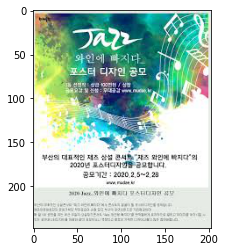

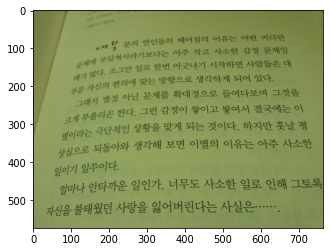

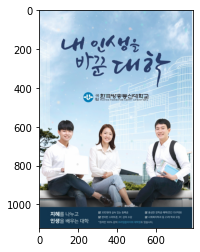

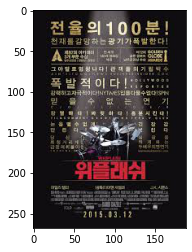

In [6]:
google()

약간의 오류를 제외하면 제법 많은 부분을 정확하게 잡아냈다.

# keras-ocr

In [7]:
pipeline = keras_ocr.pipeline.Pipeline()

images = [ keras_ocr.tools.read(img) for img in images]
prediction_groups = [pipeline.recognize([img]) for img in images]

Looking for /home/aiffel0042/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel0042/.keras-ocr/crnn_kurapan.h5


/home/aiffel0042/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


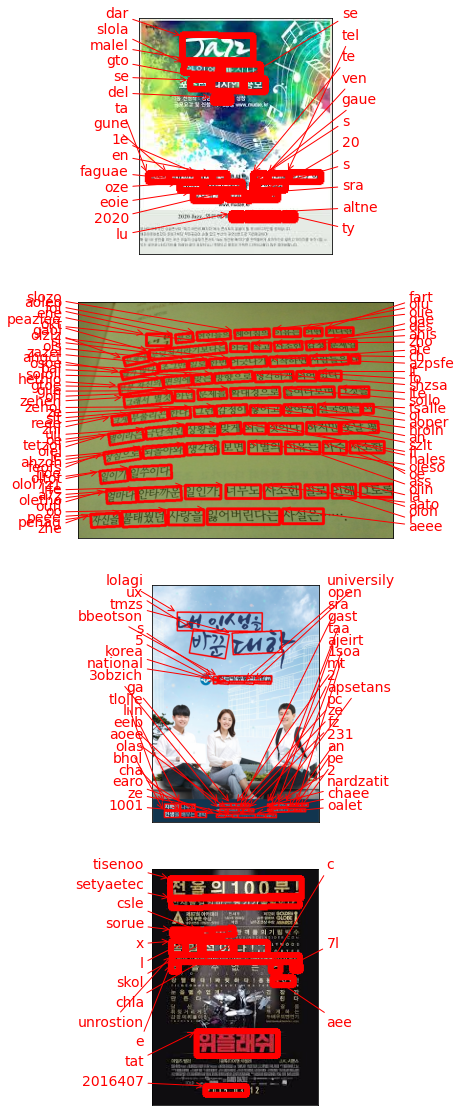

In [8]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

keras-ocr은 한글 훈련이 적용되지 않아 정확하지 않은 것을 확인할 수 있다. 또한 작은 글씨의 경우 많은 경우에 놓치는 것이 확인된다.

In [9]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.jpeg', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list



In [10]:

work_dir = os.getenv('HOME')+'/aiffel/ocr_python/file'
img_file_path = work_dir + '/images.jpeg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/home/aiffel0042/aiffel/ocr_python/file/0000.png


images.jpeg의 경우 인식이 진행되지 않았다.

In [17]:
img_file_path2 = work_dir + '/2008EC3C4FAA270525.jpeg'

cropped_image_path_list2 = crop_word_regions(img_file_path2, work_dir)

/home/aiffel0042/aiffel/ocr_python/file/0000.png
/home/aiffel0042/aiffel/ocr_python/file/0001.png
/home/aiffel0042/aiffel/ocr_python/file/0002.png
/home/aiffel0042/aiffel/ocr_python/file/0003.png
/home/aiffel0042/aiffel/ocr_python/file/0004.png
/home/aiffel0042/aiffel/ocr_python/file/0005.png
/home/aiffel0042/aiffel/ocr_python/file/0006.png
/home/aiffel0042/aiffel/ocr_python/file/0007.png
/home/aiffel0042/aiffel/ocr_python/file/0008.png
/home/aiffel0042/aiffel/ocr_python/file/0009.png
/home/aiffel0042/aiffel/ocr_python/file/0010.png
/home/aiffel0042/aiffel/ocr_python/file/0011.png
/home/aiffel0042/aiffel/ocr_python/file/0012.png
/home/aiffel0042/aiffel/ocr_python/file/0013.png
/home/aiffel0042/aiffel/ocr_python/file/0014.png
/home/aiffel0042/aiffel/ocr_python/file/0015.png
/home/aiffel0042/aiffel/ocr_python/file/0016.png
/home/aiffel0042/aiffel/ocr_python/file/0017.png
/home/aiffel0042/aiffel/ocr_python/file/0018.png
/home/aiffel0042/aiffel/ocr_python/file/0019.png
/home/aiffel0042/aif

In [15]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

!

Done


In [18]:
recognize_images(cropped_image_path_list)

 #

Done


In [19]:
recognize_images(cropped_image_path_list2)

 #

바

는

의

(더

오!

개로.

으

혀|

어

짐

의

2 |

유는

  -

211

> ㄷ후루누

. 근그쳐^

과

|

본

나

2

작 그

사수호

감정

은

제

기

<)

고

+ 조그만

역도

한변


=

나

|

시|

작

년

시

모노

들은

  -

부

ㅣ

^)

이

13

의

다

| 맞은

빙

|향

으루

생

식

하게

노|여|

이.

별

전

아넌

두

제

들

와

대

점

2

=

역

나

보며

그것을

개가 1

억마나

아타까운

일인가.

너무도

사수하

1 로

해

그토독

ㅣ

어


러

도

는

^ㅅ

나 무.

테


자

 또

'

29

(

불

태

웠

더

사

랑

주

개

0

Done


# 총평

Google OCR API
장점 : 가장 높은 정확도
단점 : 약간의 오류가 발생

keras-ocr
장점 : 가장 확실한 시각화
단점 : 상당히 낮은 정확도, 이미지 처리로 인해 오랜 시간 소요.

Tesseract
장점 : 각 글자를 잘라서 인식, 어떤 부분을 놓쳤는지 알기 쉽다.
단점 : 다소 부정확하거나 필기체 등 읽기 힘든 경우 진행 불가.

위를 미루어볼때 가장 사용에 적합한 ORC 알고리즘은 Google OCR API로 선택하였다.